# This jupyter notebook is prepared by Jared Wilson.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [2]:
from google.colab import drive

file_name = '/content/hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df=pd.read_csv(file)

print('(rows, columns):',df.shape)

(rows, columns): (8955, 15)


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [3]:
display(df.head(7).append(df.tail(7)))

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
5,12,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,1000-4999,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,10/49,Pvt Ltd,>4,18,0.0
8948,19143,33047,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,>4,18,0.0
8949,19146,13167,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,500-999,Pvt Ltd,1,51,0.0
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0


### 1.4 Show if any column has null values (0.5pt)

In [4]:
print(df.isnull().sum())

Unnamed: 0                0
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

Unnamed: 0                8955
enrollee_id               8955
city                       116
city_development_index      91
gender                       3
relevent_experience          2
enrolled_university          3
education_level              3
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             241
target                       2
dtype: int64


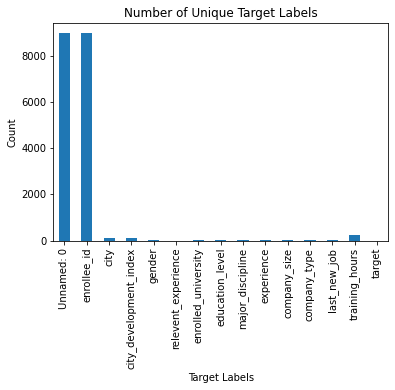

The data is not balanced, the majority of the unique labels fall into only 2 of the 15       features. This imbalance can lead to a biased learning model which would have low accuracy       for minorty features


In [5]:
print(df.nunique())

df.nunique().plot(kind='bar')
plt.xlabel('Target Labels')
plt.ylabel('Count')
plt.title('Number of Unique Target Labels')
plt.show()

print('The data is not balanced, the majority of the unique labels fall into only 2 of the 15 \
      features. This imbalance can lead to a biased learning model which would have low accuracy \
      for minorty features')

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64


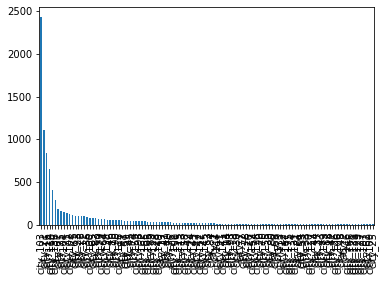

In [6]:
print(df.city.value_counts())
df.city.value_counts(ascending=False).plot(kind='bar')
plt.show()

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [7]:
print('Number of rows in top 4 cities:',df.city.value_counts(ascending=False).head(4).sum())

print('Number of rows in remaining cities:',df.city.value_counts(ascending=False).tail(-4).sum())

Number of rows in top 4 cities: 5021
Number of rows in remaining cities: 3934


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [8]:
not_top4 = df.city.value_counts()[4:].index.tolist()
df.city.replace(not_top4, 'city_others',inplace=True)

### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [9]:
display(df.head())

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

In [10]:
df.education_level.value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [11]:
def replace_labels(dataframe, column_name, dictionary):
  dataframe = dataframe.replace({column_name:dictionary})
  return dataframe

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [12]:
dictionary = {'Graduate':0, 'Masters':1, 'Phd':2}
df = replace_labels(df,'education_level', dictionary)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [13]:
display(df.head())

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [14]:
df.company_size.value_counts()

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [15]:
dictionary = {'<10':0, '10/49':1, '50-99':2, '100-500':3, '500-999':4, \
              '1000-4999':5, '5000-9999':6, '10000+':7}
df = replace_labels(df,'company_size', dictionary)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [16]:
display(df.head())

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [17]:
df.last_new_job.value_counts()

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64

### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [18]:
dictionary = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
df = replace_labels(df,'last_new_job', dictionary)

### 2.4.3 Show the updated values (1pt)

In [19]:
display(df.head())

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [20]:
df = df.drop(columns='enrollee_id')

In [21]:
unnamed_cols = df.columns.str.contains('Unnamed')
df = df.drop(columns=df[df.columns[unnamed_cols]])
display(df.head())

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
df_num = df.select_dtypes(include='number')
df[df_num.columns] = scaler.fit_transform(df_num)

### 2.6.2 Show some of the scaled records. (1pt)

In [24]:
display(df.head())

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_others,0.654691,Male,No relevent experience,no_enrollment,0.0,STEM,0.714286,0.285714,Pvt Ltd,1.0,0.137313,0.0
1,city_others,0.636727,Male,Has relevent experience,no_enrollment,0.5,STEM,1.000000,0.285714,Funded Startup,0.8,0.020896,0.0
2,city_others,0.626747,Male,Has relevent experience,no_enrollment,0.0,STEM,0.619048,0.000000,Pvt Ltd,1.0,0.050746,1.0
3,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.333333,0.285714,Pvt Ltd,0.2,0.134328,1.0
4,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.238095,0.857143,Pvt Ltd,0.2,0.319403,0.0


# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat = df.select_dtypes(include='object')
df[df_cat.columns] = df_cat.apply(le.fit_transform)
display(df)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,4,0.654691,1,1,2,0.0,5,0.714286,0.285714,5,1.0,0.137313,0.0
1,4,0.636727,1,0,2,0.5,5,1.000000,0.285714,1,0.8,0.020896,0.0
2,4,0.626747,1,0,2,0.0,5,0.619048,0.000000,5,1.0,0.050746,1.0
3,0,0.942116,1,0,2,0.0,5,0.333333,0.285714,5,0.2,0.134328,1.0
4,0,0.942116,1,0,2,0.0,5,0.238095,0.857143,5,0.2,0.319403,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,3,0.351297,1,1,0,0.0,5,0.047619,0.428571,5,0.2,0.152239,1.0
8951,0,0.942116,1,0,2,0.5,5,0.428571,0.285714,5,0.2,0.104478,1.0
8952,4,0.942116,0,0,2,0.0,5,0.476190,0.428571,4,0.6,0.065672,0.0
8953,0,0.942116,0,0,2,0.0,2,0.333333,0.142857,1,0.2,0.071642,0.0


### 3.2 Copy all the features into X and the target to Y (2pt)

In [26]:
X = df.loc[:, df.columns != 'target']
y = df.target

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [27]:
from collections import Counter
print(f'Original ratio of 1 and 0 {Counter(y)}')
a = y.value_counts()
print('Ratio of 0 to 1:', a[0]/a[1])
print('Ratio of 1 to 0:', a[1]/a[0])

Original ratio of 1 and 0 Counter({0.0: 7472, 1.0: 1483})
Ratio of 0 to 1: 5.0384356035064055
Ratio of 1 to 0: 0.19847430406852248


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

a = y_train.value_counts()
print('y_train:')
print(f'{Counter(y_train)}')
print('Ratio of 0 to 1:', a[0]/a[1])
print('Ratio of 1 to 0:', a[1]/a[0])

a = y_test.value_counts()
print('\ny_test:')
print(f'{Counter(y_test)}')
print('Ratio of 0 to 1:', a[0]/a[1])
print('Ratio of 1 to 0:', a[1]/a[0])

y_train:
Counter({0.0: 5230, 1.0: 1038})
Ratio of 0 to 1: 5.038535645472062
Ratio of 1 to 0: 0.19847036328871892

y_test:
Counter({0.0: 2242, 1.0: 445})
Ratio of 0 to 1: 5.038202247191011
Ratio of 1 to 0: 0.19848349687778769


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [29]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

cat_col_index = [df.columns.get_loc(c) for c in df_cat.columns if c in df_cat]
sm = SMOTENC(categorical_features=cat_col_index)
X_res, y_res = sm.fit_resample(X_train, y_train)

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [30]:
print(f'Resampled ratio in label {Counter(X_res)}')
print(f'Resampled ratio in label {Counter(y_res)}')
a=y_res.value_counts()
print('Ratio of 0 to 1:', a[0]/a[1])
print('Ratio of 1 to 0:', a[1]/a[0])

Resampled ratio in label Counter({'city': 1, 'city_development_index': 1, 'gender': 1, 'relevent_experience': 1, 'enrolled_university': 1, 'education_level': 1, 'major_discipline': 1, 'experience': 1, 'company_size': 1, 'company_type': 1, 'last_new_job': 1, 'training_hours': 1})
Resampled ratio in label Counter({0.0: 5230, 1.0: 5230})
Ratio of 0 to 1: 1.0
Ratio of 1 to 0: 1.0


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [32]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion': ['gini','entropy'],
    'max_depth': range(2,10),
    'min_samples_split': range(2,10),
    'max_features': ['auto','sqrt','log2', None]
}
grid_dt = GridSearchCV(
    estimator=dt_clf,
    param_grid=params,
    cv=5
    )

In [33]:
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_split': 2}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [34]:
dt_clf.set_params(**grid_dt.best_params_)
dt_clf.fit(X_train,y_train)
predictions_dt = dt_clf.predict(X_test)
predictions_dt_proba = dt_clf.predict_proba(X_test)[:,1]

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
print('accuracy_score:',accuracy_score(y_test,predictions_dt))
print('precision_score:',precision_score(y_test,predictions_dt))
print('recall_score:',recall_score(y_test,predictions_dt))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions_dt))
print('f1_score:',f1_score(y_test,predictions_dt))
print('roc_auc_score:',roc_auc_score(y_test,predictions_dt_proba))

accuracy_score: 0.8585783401563082
precision_score: 0.5818639798488665
recall_score: 0.5191011235955056
confusion_matrix:
 [[2076  166]
 [ 214  231]]
f1_score: 0.5486935866983373
roc_auc_score: 0.7464112098948572


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

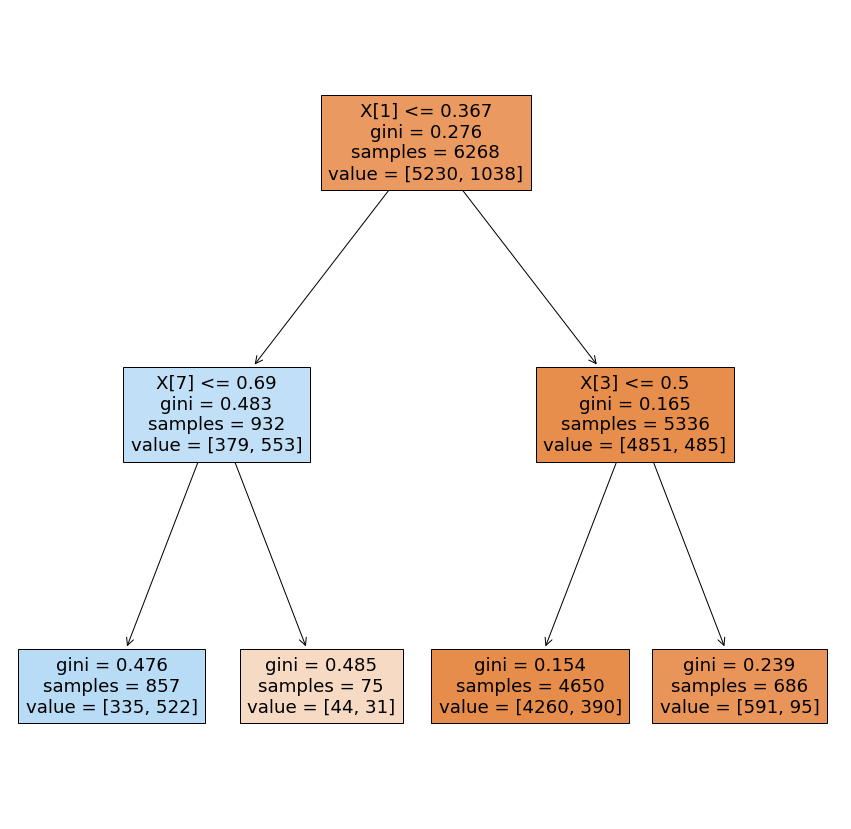

In [36]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dt_clf,filled=True)
plt.show()

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [37]:
dt_clf_new = DecisionTreeClassifier(random_state=42)
dt_clf_new.set_params(**grid_dt.best_params_)
dt_clf_new.fit(X_res,y_res)
predictions_dt_new = dt_clf_new.predict(X_test)
predictions_dt_new_proba = dt_clf_new.predict_proba(X_test)[:,1]

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [38]:
print('accuracy_score:',accuracy_score(y_test,predictions_dt_new))
print('precision_score:',precision_score(y_test,predictions_dt_new))
print('recall_score:',recall_score(y_test,predictions_dt_new))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions_dt_new))
print('f1_score:',f1_score(y_test,predictions_dt_new))
print('roc_auc_score:',roc_auc_score(y_test,predictions_dt_new_proba))

accuracy_score: 0.8567175288425753
precision_score: 0.5697674418604651
recall_score: 0.550561797752809
confusion_matrix:
 [[2057  185]
 [ 200  245]]
f1_score: 0.56
roc_auc_score: 0.7330152652627571


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

*   The evaluation scores on the balanced train set are generally higher because it has a proportional quantity of tests in each class.
*   accuracy_score, precision_score, and roc_auc_score are higher for the unbalanced data
*   In the confusion matrix, the balanced should have less false positives and less false negatives
*   recall_score and f1_score are higher for the balanced data







# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(criterion='entropy',random_state=42)
n_estimators = [200,500]
max_depth = [3,5,7]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
params = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
grid_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=params, 
    scoring='roc_auc',
    n_jobs=-1, 
    cv=5,
    refit=True,
    return_train_score=True
    )
grid_rf.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='roc_auc')

### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [40]:
print(grid_rf.best_params_)
predictions_rf = grid_rf.best_estimator_.predict(X_test)
predictions_rf_proba = grid_rf.best_estimator_.predict_proba(X_test)[:,1]

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [55]:
print('accuracy_score:',accuracy_score(y_test,predictions_rf))
print('precision_score:',precision_score(y_test,predictions_rf))
print('recall_score:',recall_score(y_test,predictions_rf))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions_rf))
print('f1_score:',f1_score(y_test,predictions_rf))
print('roc_auc_score:',roc_auc_score(y_test,predictions_rf_proba))

SyntaxError: ignored

# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [42]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators': [10,50,250,1000],
    'learning_rate':[.01,.1]
}
grid_ada = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    params,
    n_jobs=-1,
    cv=5,
    refit=True,
    return_train_score=True
    )
grid_ada.fit(X_res,y_res)
print(grid_ada.best_params_)

{'learning_rate': 0.1, 'n_estimators': 1000}


### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [43]:
predictions_ada = grid_ada.best_estimator_.predict(X_test)
predictions_ada_proba = grid_ada.best_estimator_.predict_proba(X_test)[:,1]

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [44]:
print('accuracy_score:',accuracy_score(y_test,predictions_ada))
print('precision_score:',precision_score(y_test,predictions_ada))
print('recall_score:',recall_score(y_test,predictions_ada))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions_ada))
print('f1_score:',f1_score(y_test,predictions_ada))
print('roc_auc_score:',roc_auc_score(y_test,predictions_ada_proba))

accuracy_score: 0.8448083364346856
precision_score: 0.5299145299145299
recall_score: 0.5573033707865168
confusion_matrix:
 [[2022  220]
 [ 197  248]]
f1_score: 0.5432639649507119
roc_auc_score: 0.7369152742835952


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators':[100,250,500],
    'max_depth':[3,4,5],
    'learning_rate':[0.001,0.01,0.1]
}

grid_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    params,
    n_jobs=-1,
    cv=5,
    refit=True,
    return_train_score=True
    )
grid_gb.fit(X_res,y_res)
print(grid_gb.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [47]:
predictions_gb = grid_gb.best_estimator_.predict(X_test)
predictions_gb_proba = grid_ada.best_estimator_.predict_proba(X_test)[:,1]

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [48]:
print('accuracy_score:',accuracy_score(y_test,predictions_gb))
print('precision_score:',precision_score(y_test,predictions_gb))
print('recall_score:',recall_score(y_test,predictions_gb))
print('confusion_matrix:\n',confusion_matrix(y_test,predictions_gb))
print('f1_score:',f1_score(y_test,predictions_gb))
print('roc_auc_score:',roc_auc_score(y_test,predictions_gb_proba))

accuracy_score: 0.8503907703758838
precision_score: 0.5609065155807366
recall_score: 0.4449438202247191
confusion_matrix:
 [[2087  155]
 [ 247  198]]
f1_score: 0.4962406015037595
roc_auc_score: 0.7369152742835952


# 7. Summary Discussion (4 pts)

Which model yields the highest precision?
*   The Decision Tree Classifier on the unbalanced training set

Which model yields the lowest recall? 

*   The Gradient Boosting Classifier

Which model yields the higest True Positive (TP)? 

*   The Gradient Boosting Classifier

Which model yields the best performance overall? 

*   The Gradient Boosting Classifier

